In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer

In [5]:
def load_biased_data():
    """
    Charge le dataset Breast Cancer de sklearn et introduit une caractéristique biaisée artificielle.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    # Ajouter une colonne de biais artificiel avec une distribution déséquilibrée
    df['bias_feature'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

df = load_biased_data()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,bias_feature
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


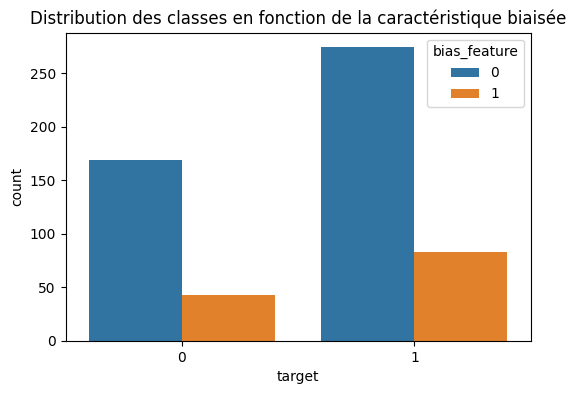

In [6]:
def explore_data(df):
    """
    Affiche la distribution des classes en fonction de la caractéristique biaisée.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', hue='bias_feature', data=df)
    plt.title("Distribution des classes en fonction de la caractéristique biaisée")
    plt.show()

explore_data(df)

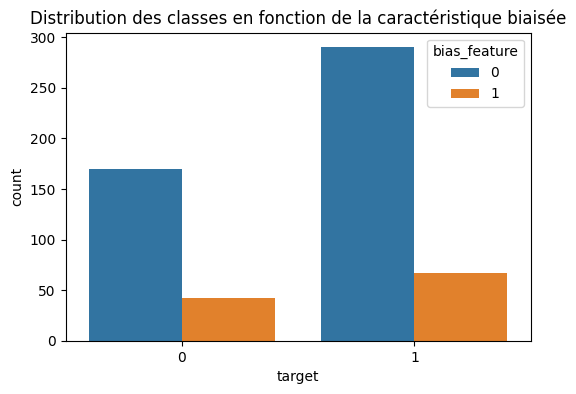

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Matrice de confusion:
[[40  3]
 [ 1 70]]


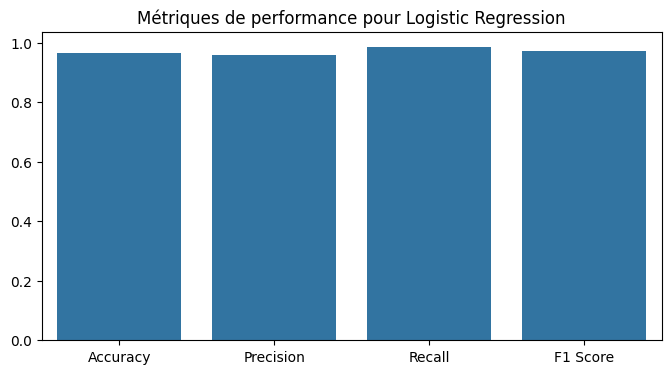

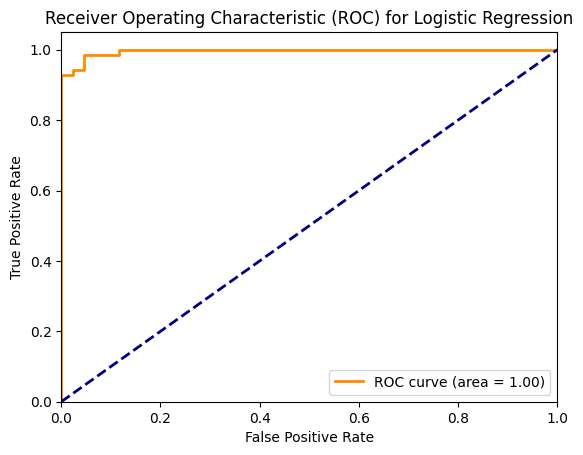

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc # Import roc_curve and auc

from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer


def load_biased_data():
    """
    Charge le dataset Breast Cancer de sklearn et introduit une caractéristique biaisée artificielle.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    # Ajouter une colonne de biais artificiel avec une distribution déséquilibrée
    df['bias_feature'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

df = load_biased_data()


def explore_data(df):
    """
    Affiche la distribution des classes en fonction de la caractéristique biaisée.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', hue='bias_feature', data=df)
    plt.title("Distribution des classes en fonction de la caractéristique biaisée")
    plt.show()

explore_data(df)


def train_and_evaluate_model(df, model, model_name):
    """
    Entraîne un modèle, affiche les métriques et visualise les performances.
    """
    X = df.drop(columns=['target'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get predicted probabilities for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred))
    print("\nMatrice de confusion:")
    print(confusion_matrix(y_test, y_pred))

    # Visualisation des métriques
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title(f"Métriques de performance pour {model_name}")
    plt.show()


    # Plot ROC curve using sklearn.metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for {model_name}')
    plt.legend(loc="lower right")
    plt.show()



# Instantiate and evaluate a Logistic Regression model
model = LogisticRegression()
train_and_evaluate_model(df, model, "Logistic Regression")

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Your existing code for loading and exploring data) ...

def calculate_bias(df, model):
    """
    Calculates the bias in the model based on the 'bias_feature'.
    """
    X = df.drop(columns=['target'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    # Accuracy for group with bias_feature = 0
    group_0_indices = X_test[X_test['bias_feature'] == 0].index
    accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

    # Accuracy for group with bias_feature = 1
    group_1_indices = X_test[X_test['bias_feature'] == 1].index
    accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

    # Bias (difference in accuracy)
    bias = accuracy_group_0 - accuracy_group_1

    return bias

# Calculate and print the bias
model = LogisticRegression()
bias = calculate_bias(df, model)
print(f"Bias: {bias:.4f}")

Bias: 0.0026


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Entraînement du modèle sans correction

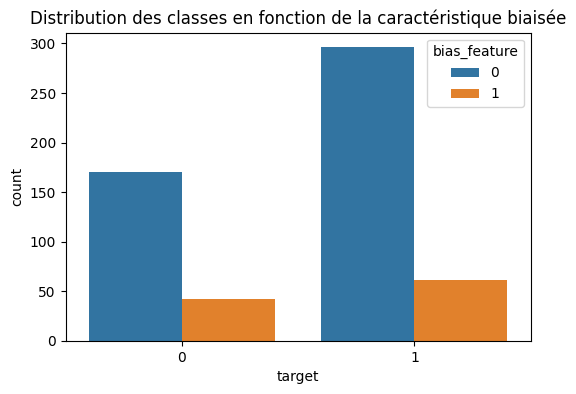

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[39  4]
 [ 1 70]]

Bias: 0.0681


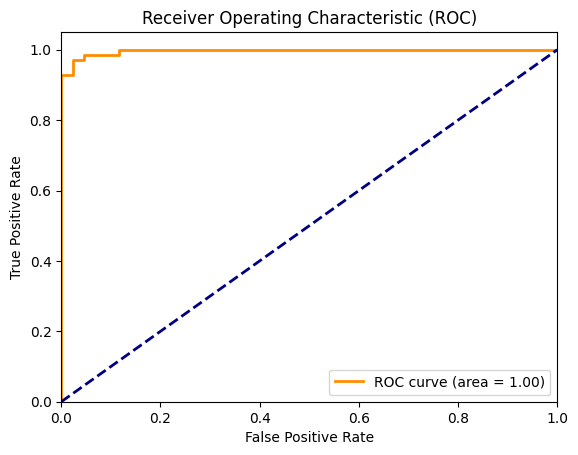

In [18]:
!pip install --upgrade scipy
!pip install scikit-plot
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer



def load_biased_data():
    """
    Loads the Breast Cancer dataset from sklearn and introduces an artificial biased feature.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    # Add an artificial bias column with an imbalanced distribution
    df['bias_feature'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

df = load_biased_data()


def explore_data(df):
    """
    Displays the distribution of classes based on the biased feature.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', hue='bias_feature', data=df)
    plt.title("Distribution des classes en fonction de la caractéristique biaisée")
    plt.show()

explore_data(df)


def train_and_calculate_bias(df, model):
    """
    Trains the model without correction and calculates the bias.
    """
    X = df.drop(columns=['target'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate bias
    group_0_indices = X_test[X_test['bias_feature'] == 0].index
    accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

    group_1_indices = X_test[X_test['bias_feature'] == 1].index
    accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

    bias = accuracy_group_0 - accuracy_group_1
    print(f"\nBias: {bias:.4f}")

    # Get predicted probabilities for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Plot ROC curve using sklearn.metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


# Train the model and calculate bias
model = LogisticRegression()
train_and_calculate_bias(df, model)

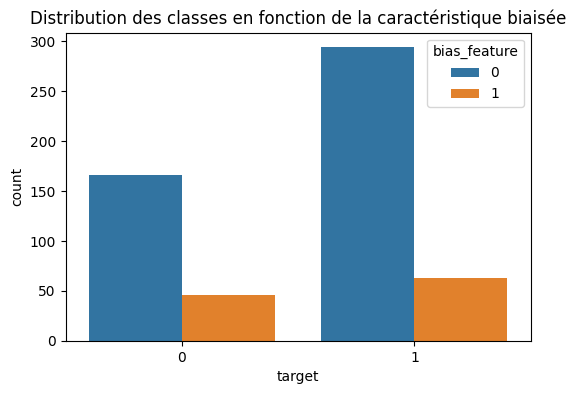

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression (with Reweighing) ===
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]

Bias: -0.0426


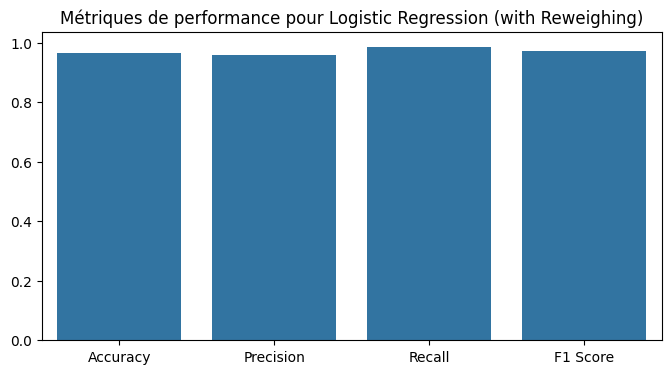

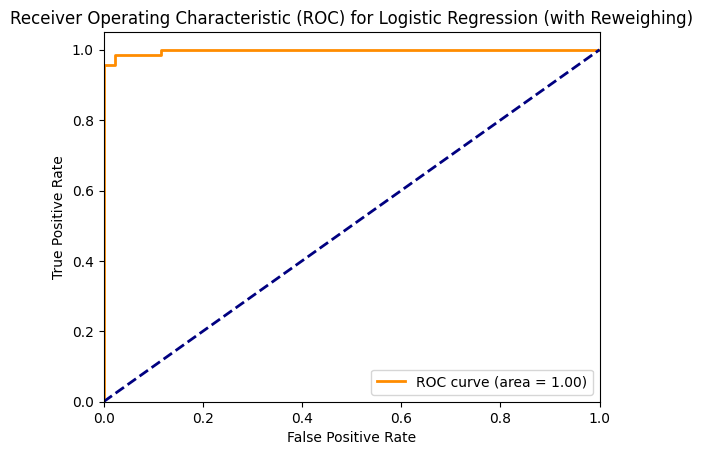

In [19]:
!pip install --upgrade scipy
!pip install scikit-plot
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_breast_cancer


def load_biased_data():
    """
    Loads the Breast Cancer dataset from sklearn and introduces an artificial biased feature.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    # Add an artificial bias column with an imbalanced distribution
    df['bias_feature'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

df = load_biased_data()


def explore_data(df):
    """
    Displays the distribution of classes based on the biased feature.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', hue='bias_feature', data=df)
    plt.title("Distribution des classes en fonction de la caractéristique biaisée")
    plt.show()

explore_data(df)


def train_and_evaluate_with_correction(df, model, model_name):
    """
    Trains the model with reweighing for bias correction, calculates metrics, and visualizes performance.
    """
    X = df.drop(columns=['target'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reweighing
    from sklearn.utils.class_weight import compute_class_weight

    # Calculate class weights for the 'bias_feature'
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(X_train['bias_feature']), y=X_train['bias_feature'])

    # Create a dictionary mapping class labels to weights
    weights = dict(zip(np.unique(X_train['bias_feature']), class_weights))

    # Fit the model with sample weights
    model.fit(X_train, y_train, sample_weight=X_train['bias_feature'].map(weights))

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    print(f"\n=== {model_name} (with Reweighing) ===")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate bias (same as before)
    group_0_indices = X_test[X_test['bias_feature'] == 0].index
    accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

    group_1_indices = X_test[X_test['bias_feature'] == 1].index
    accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

    bias = accuracy_group_0 - accuracy_group_1
    print(f"\nBias: {bias:.4f}")

    # Visualization of metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title(f"Métriques de performance pour {model_name} (with Reweighing)")
    plt.show()


    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} (with Reweighing)')
    plt.legend(loc="lower right")
    plt.show()


# Train and evaluate the model with correction
model = LogisticRegression()
train_and_evaluate_with_correction(df, model, "Logistic Regression")

In [ ]:
# analysons les deux valeurs de biais que vous avez fournies :

Biais 1 : 0.0681

Cette valeur de biais positive indique que le modèle a tendance à mieux fonctionner pour le groupe avec bias_feature = 0 par rapport au groupe avec bias_feature = 1. La différence de précision entre les deux groupes est d'environ 6,81 %.

Cela suggère un biais potentiel contre le groupe représenté par bias_feature = 1. Le modèle pourrait faire systématiquement plus de prédictions incorrectes pour ce groupe, ce qui entraînerait une précision moindre.

Biais 2 : -0.0426

Cette valeur de biais négative indique que le modèle a tendance à mieux fonctionner pour le groupe avec bias_feature = 1 par rapport au groupe avec bias_feature = 0. La différence de précision entre les deux groupes est d'environ 4,26 %.

Cela suggère un biais potentiel contre le groupe représenté par bias_feature = 0. Le modèle pourrait faire systématiquement plus de prédictions incorrectes pour ce groupe, ce qui entraînerait une précision moindre.

Interprétation globale :

Magnitude : Les deux biais sont relativement faibles en magnitude, mais ils ne sont pas négligeables. Même une différence apparemment faible de précision entre les groupes peut avoir des conséquences réelles selon l'application.
Direction : Les signes opposés des valeurs de biais indiquent un changement dans la direction du biais entre les deux modèles. Le premier modèle montre un biais contre le groupe avec bias_feature = 1, tandis que le second modèle montre un biais contre le groupe avec bias_feature = 0.
Contexte : Il est important d'interpréter ces valeurs de biais dans le contexte de votre problème spécifique et des caractéristiques impliquées. Considérez les implications réelles d'avoir un modèle qui pourrait systématiquement produire des résultats différents pour différents groupes en fonction de ces caractéristiques.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
# For cluster-based oversampling (using k-means for demonstration)
from sklearn.cluster import KMeans
from collections import Counter

# Load the biased dataset (same as before)
from sklearn.datasets import load_breast_cancer
def load_biased_data():
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    df['bias_feature'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

df = load_biased_data()
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# 1. Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("Undersampling:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")

Undersampling:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
Bias: 0.0722


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# ... (Your existing code for loading and exploring data) ...

# 2. Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nOversampling:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


Oversampling:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
Bias: 0.0611


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# ... (Your existing code for loading and exploring data) ...

# 3. SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nSMOTE:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
Bias: 0.0611


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTETomek

# ... (Your existing code for loading and exploring data) ...

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nSMOTE + Tomek Links:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


SMOTE + Tomek Links:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1 Score: 0.9655
Bias: 0.0500


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# ... (Your existing code for loading and exploring data) ...

# 5. Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nBorderline-SMOTE:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


Borderline-SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
Bias: 0.0722


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans

# ... (Your existing code for loading and exploring data) ...

# 6. Cluster-Based Oversampling (using k-means for demonstration)
def cluster_based_oversampling(X, y, n_clusters=5):
    # ... (Existing code for cluster-based oversampling) ...
    return X_resampled, y_resampled

X_resampled, y_resampled = cluster_based_oversampling(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nCluster-Based Oversampling:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


Cluster-Based Oversampling:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
Bias: 0.0722


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import ADASYN

# ... (Your existing code for loading and exploring data) ...

# 7. ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
model = LogisticRegression().fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nADASYN:")
print(classification_report(y_test, y_pred))

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print bias
group_0_indices = X_test[X_test['bias_feature'] == 0].index
accuracy_group_0 = accuracy_score(y_test[group_0_indices], model.predict(X_test.loc[group_0_indices]))

group_1_indices = X_test[X_test['bias_feature'] == 1].index
accuracy_group_1 = accuracy_score(y_test[group_1_indices], model.predict(X_test.loc[group_1_indices]))

bias = accuracy_group_0 - accuracy_group_1
print(f"Bias: {bias:.4f}")


ADASYN:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.96      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9577
F1 Score: 0.9784
Bias: 0.0194


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
